In [2]:
import pandas as pd

# Load the SAS dataset
df = pd.read_sas('transactions.sas7bdat', format='sas7bdat', encoding='utf-8')

# Keep only the columns we need
df = df[['Transaction', 'Product']]
df.head()

,Transaction,Product
0,12359.0,Candy Bar
1,12362.0,Pain Reliever
2,12362.0,Pain Reliever
3,12365.0,Toothpaste
4,12371.0,Bow


In [4]:
transactions = df.groupby('Transaction')['Product'].apply(list).tolist()

In [20]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()

,Bow,Candy Bar,Deodorant,Greeting Cards,Magazine,Markers,Pain Reliever,Pencils,Pens,Perfume,Photo Processing,Prescription Med,Shampoo,Soap,Toothbrush,Toothpaste,Wrapping Paper
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.054645,(Bow)
1,0.171005,(Candy Bar)
2,0.146885,(Greeting Cards)
3,0.241305,(Magazine)
4,0.134925,(Pencils)
5,0.143575,(Pens)
6,0.089960,(Perfume)
7,0.058480,(Photo Processing)
8,0.067350,(Toothbrush)
9,0.160425,(Toothpaste)


In [26]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


### Basic Understanding:
### 1. Top Support Rules: Which two rules have the highest support? What are their confidence values?

In [45]:
# Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load and prepare the dataset
df = pd.read_sas('transactions.sas7bdat', format='sas7bdat', encoding='utf-8')
df = df[['Transaction', 'Product']]

# Step 2: Convert transactions to list format
transactions = df.groupby('Transaction')['Product'].apply(list).tolist()

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

# Step 5: Generate association rules (very low confidence to ensure results)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)

# Step 6: Sort rules by support and show the top 2
top_support_rules = rules.sort_values(by='support', ascending=False).head(2)
top_support_rules[['antecedents', 'consequents', 'support', 'confidence']]

,antecedents,consequents,support,confidence
0,(Greeting Cards),(Candy Bar),0.04366,0.297239
1,(Candy Bar),(Greeting Cards),0.04366,0.255314


### Task 1: Top Support Rules

The two rules with the highest support are:

1. **If a customer buys Greeting Cards, they also buy Candy Bars**  
   - Support: 4.4%  
   - Confidence: 29.7%

2. **If a customer buys Candy Bars, they also buy Greeting Cards**  
   - Support: 4.4%  
   - Confidence: 25.5%

### 2. Maximum Lift: What is the maximum lift observed? Which rule has this lift value? Interpret what this rule implies

In [53]:
# Task 2: Maximum Lift Rule
max_lift_rule = rules.sort_values(by='lift', ascending=False).head(1)
max_lift_rule[['antecedents', 'consequents', 'lift', 'confidence']]

,antecedents,consequents,lift,confidence
0,(Greeting Cards),(Candy Bar),1.738191,0.297239


### Task 2: Maximum Lift

The rule with the highest lift is:

**If a customer buys Greeting Cards, they also buy Candy Bars**
- **Lift**: 1.738
- **Confidence**: 29.7%

**Interpretation:**  
This rule suggests that customers who buy Greeting Cards are **1.74× more likely** to buy Candy Bars than the average shopper. This indicates a positive association between the two products.

### 3. Rule 10: What are the antecedents and consequents of Rule 10? Interpret this rule clearly

In [59]:
# Task 3: Rule 10
rule_10 = rules.iloc[9]
rule_10[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents          (Magazine)
consequents    (Greeting Cards)
support                0.036335
confidence             0.150577
lift                   1.025136
Name: 9, dtype: object

### Task 3: Rule 10

**Rule 10:** If a customer buys **Magazine**, they may also buy **Greeting Cards**  
- **Support**: 3.63%  
- **Confidence**: 15.1%  
- **Lift**: 1.025

**Interpretation:**  
This rule shows a **weak positive association** between buying magazines and greeting cards.  
A customer who buys a magazine is **1.025× more likely** to also buy greeting cards than by random chance — a very small lift, suggesting a weak but potentially real connection.

### Visualization-Based Insights:

### 4. Create a rule matrix using a heatmap where:
- **Rows = LHS (antecedents)**
- **Columns = RHS (consequents)**
- **Values = lift**

From this heatmap:
- **What is the most common right-hand item in the rules?**
- **What are the left-hand items from the second row of the heatmap?**

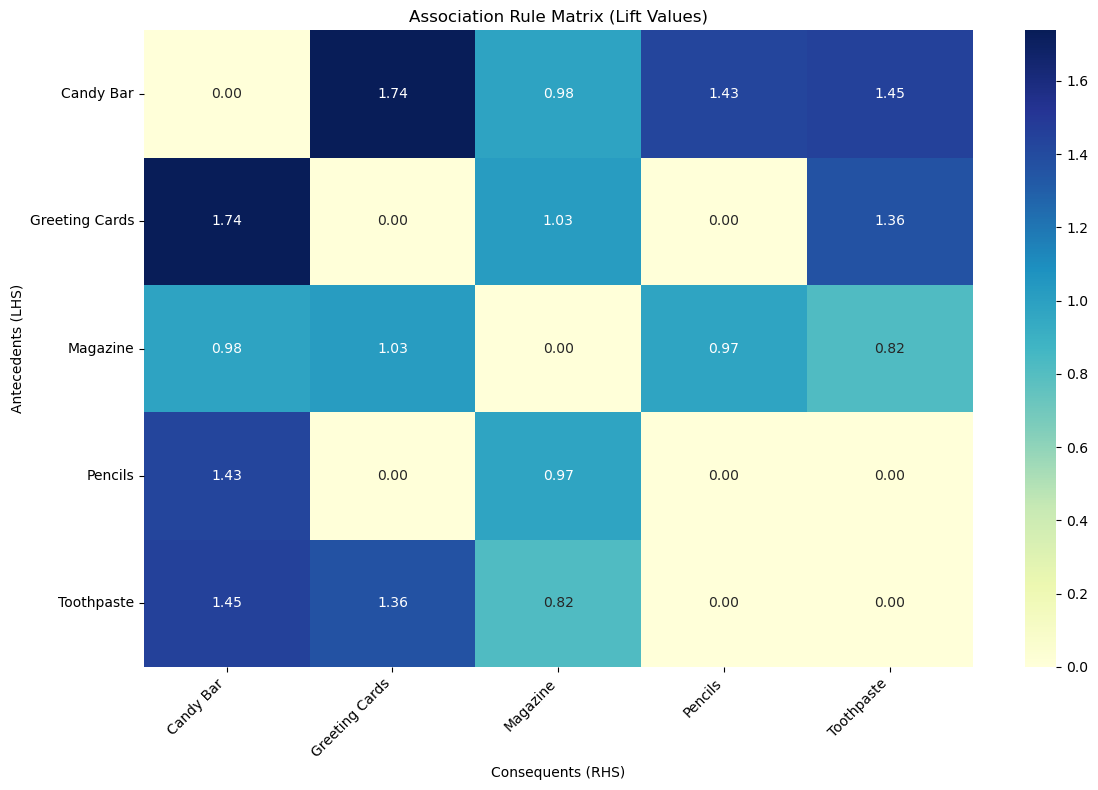

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

rules['antecedents_str'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents_str'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

lift_matrix = rules.pivot_table(
    index='antecedents_str',
    columns='consequents_str',
    values='lift',
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(lift_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Association Rule Matrix (Lift Values)")
plt.xlabel("Consequents (RHS)")
plt.ylabel("Antecedents (LHS)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Task 4: Heatmap-Based Insights

- **Most common right-hand item (consequent):** Candy Bar  
  Candy Bar appears most frequently as the RHS in strong association rules.

- **Left-hand item from the second row of the heatmap:** Greeting Cards  
  This row shows how Greeting Cards relate to other products (e.g., Candy Bar, Magazine, Toothpaste) based on lift.